In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import  pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.cm as cm
import numpy as np

In [3]:
half_processed_train = pd.read_csv('/content/drive/MyDrive/Final Project/half_processed_train.csv', low_memory=False)

In [4]:
pre_processed_train = pd.read_csv('/content/drive/MyDrive/Final Project/pre_processed_train.csv', low_memory=False)

**columns**

Id ==> Anonymized user ID

Day - Month - Year ==> Diary date

Sequence ==> Sequence of particular dish

meal_time ==> Breakfast, Lunch, Dinner

is_snack, is_drink, is_supplement, is_workout ==> Binary confirmation if food is particular sort of

Calories_value, Carbs_value ... Vit C_value ==> Nutrients of each meal

Calcium_total, Carbs_total ... Vit C_value ==> Daily aggregate of nutrient intake

Calcium_goal, Carbs_goal ... Vit C_goal ==> Daily aggregate of nutrient goal


In [ ]:
print(f"Train data which is not processed in anomaly detecction")
print(half_processed_train.columns)
print('=======================================================================')
print(f"Train data with anomaly detecction")
print(pre_processed_train.columns)

Train data which is not processed in anomaly detecction
Index(['Id', 'Day', 'Month', 'Year', 'Sequence', 'meal_time', 'is_snack',
       'is_drinks', 'is_supplement', 'is_workout', 'Calories_value',
       'Carbs_value', 'Fat_value', 'Protein_value', 'Sodium_value',
       'Sugar_value', 'Calories_total', 'Carbs_total', 'Fat_total',
       'Fiber_total', 'Protein_total', 'Sodium_total', 'Sugar_total',
       'Calories_goal', 'Carbs_goal', 'Fat_goal', 'Fiber_goal', 'Protein_goal',
       'Sodium_goal', 'Sugar_goal', 'DishName', 'success_index'],
      dtype='object')
Train data with anomaly detecction
Index(['Unnamed: 0', 'Id', 'Day', 'Month', 'Year', 'Sequence', 'meal_time',
       'is_snack', 'is_drinks', 'is_supplement', 'is_workout',
       'Calories_value', 'Carbs_value', 'Fat_value', 'Protein_value',
       'Sodium_value', 'Sugar_value', 'Calories_total', 'Carbs_total',
       'Fat_total', 'Fiber_total', 'Protein_total', 'Sodium_total',
       'Sugar_total', 'Calories_goal', 'Carb

In [5]:
def reverse_normalization(normalized_df, column):
    min_max_df = pd.read_csv('/content/drive/MyDrive/Final Project/min_max.csv', index_col=0)

    min_val = min_max_df.loc[column, 'Min']
    max_val = min_max_df.loc[column, 'Max']

    original_values = normalized_df[column] * (max_val - min_val) + min_val

    return original_values

In [6]:
def pie_chart(df, column, min_max_csv='final_project/min_max.csv'):
    def plot_pie_chart(ax, data, title):
        count_num = data.value_counts()
        category = count_num.index
        value = count_num.values

        label_format = '%1.1f%%'
        value_format = '%d'

        rounded_values = [round(val) for val in category]

        wedges, texts, autotexts = ax.pie(rounded_values, labels=[value_format % val for val in rounded_values],
                                          startangle=0, shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                          autopct='', colors=None, explode=None, radius=1)

        legend_labels = [f'{label_format % (100 * value[i] / sum(value))}' for i in range(len(category))]

        ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.18, 0.6))

        for wedge in wedges:
            wedge.set_linewidth(1)
            wedge.set_edgecolor('white')

        center_circle = plt.Circle((0, 0), 0.5, color='white')
        ax.add_artist(center_circle)
        ax.set_title(title, fontsize=16, fontweight='bold')

    original_values = reverse_normalization(df, column)

    original_df = df.copy()
    original_df[column] = original_values

    fig, ax = plt.subplots(figsize=(10, 10))

    plot_pie_chart(ax, original_df[column], f'Pie Chart for {column}')

    plt.tight_layout()
    plt.show()


In [7]:
def bar_chart(df, column, min_max_csv='final_project/min_max.csv'):
    def plot_bar_chart(ax, categories, values, colors, xlabel, ylabel, title):
        bars = ax.bar(categories, values, color=colors)

        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=45, ha='right')

        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom')

        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_title(title, fontsize=14, fontweight='bold')

    original_values = reverse_normalization(df, column)

    original_df = df.copy()
    original_df[column] = original_values

    counts = original_df[column].value_counts()
    categories = counts.index
    values = counts.values

    colors = sns.color_palette('viridis', len(categories))

    fig, ax = plt.subplots(figsize=(10, 6))
    plot_bar_chart(ax, categories, values, colors, xlabel='Categories', ylabel='Values', title=f'Bar Chart for {column}')

    plt.tight_layout()
    plt.show()

In [8]:
def box_plot_for_dataset(df, column, border_bl = 0, border_up = 2):

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.boxplot(df[column].dropna(), patch_artist=True,
               boxprops=dict(facecolor='skyblue', color='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               medianprops=dict(color='red'))

    ax.set_title(f'Box Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Values')

    ax.set_ylim(border_bl, border_up)

    plt.tight_layout()
    plt.show()

# **Here are visualization of categorical columns**
In all visualization it is visible that there are not tremendous imbalance in different categories.

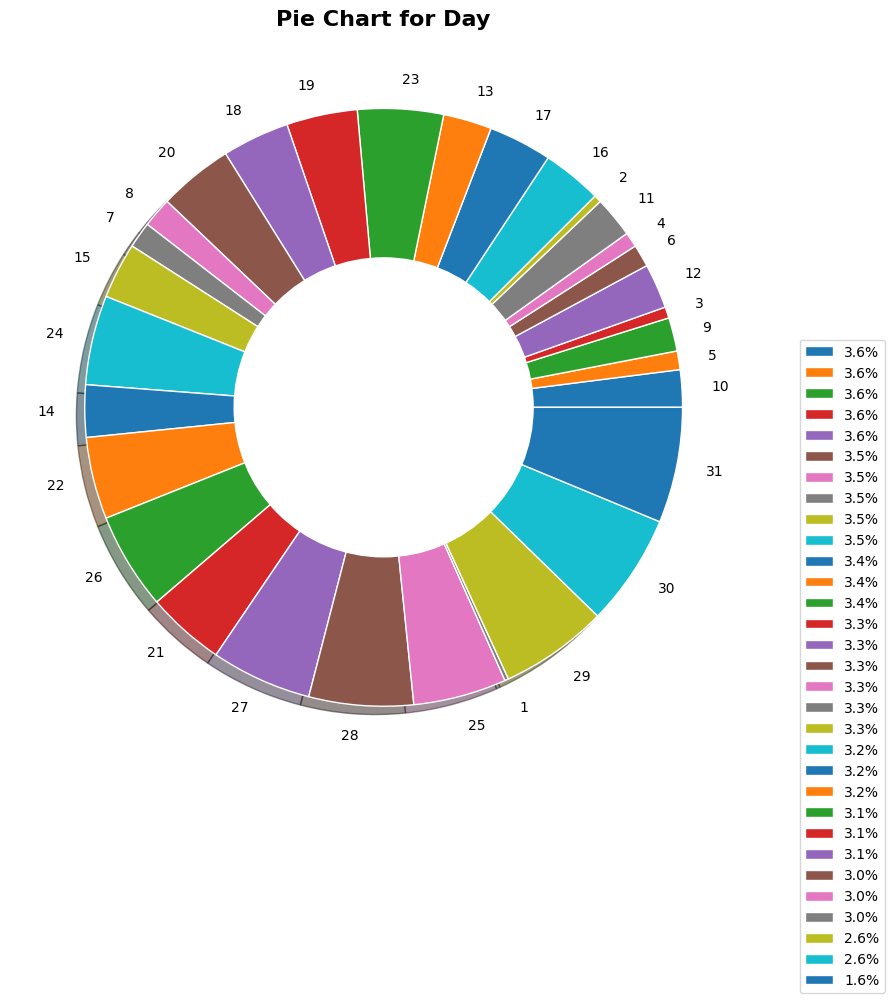

In [ ]:
pie_chart(half_processed_train, 'Day')

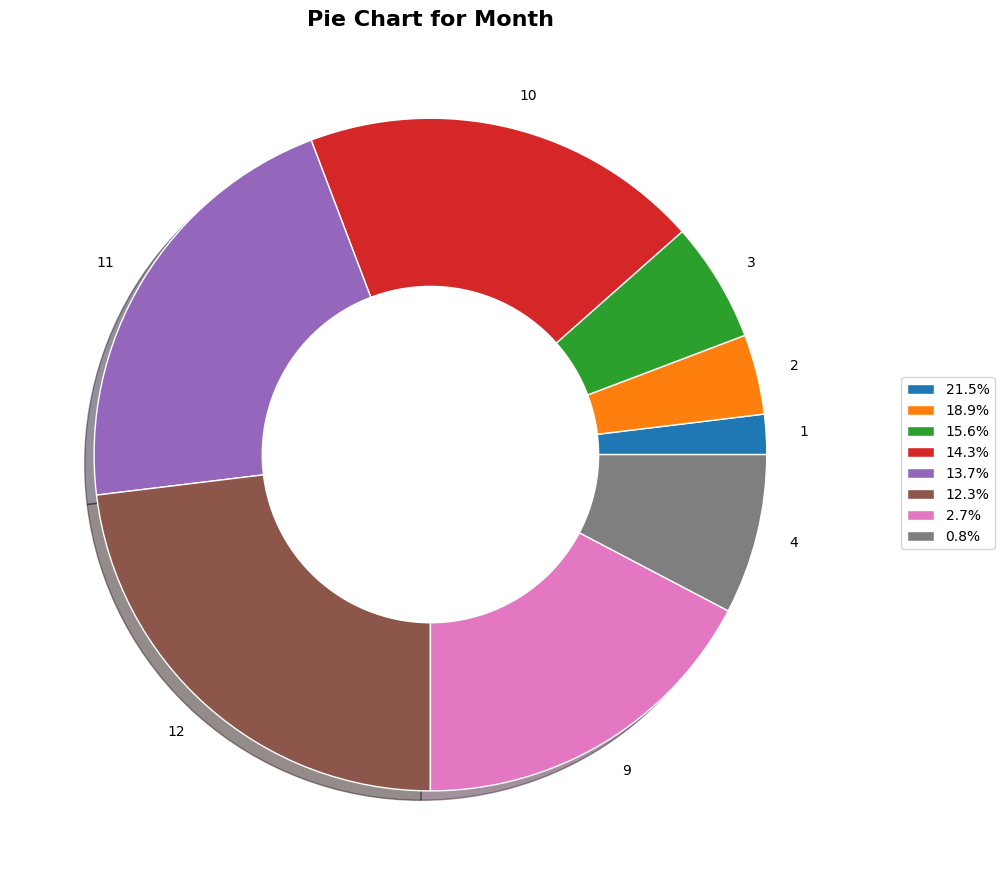

In [ ]:
pie_chart(half_processed_train, 'Month')

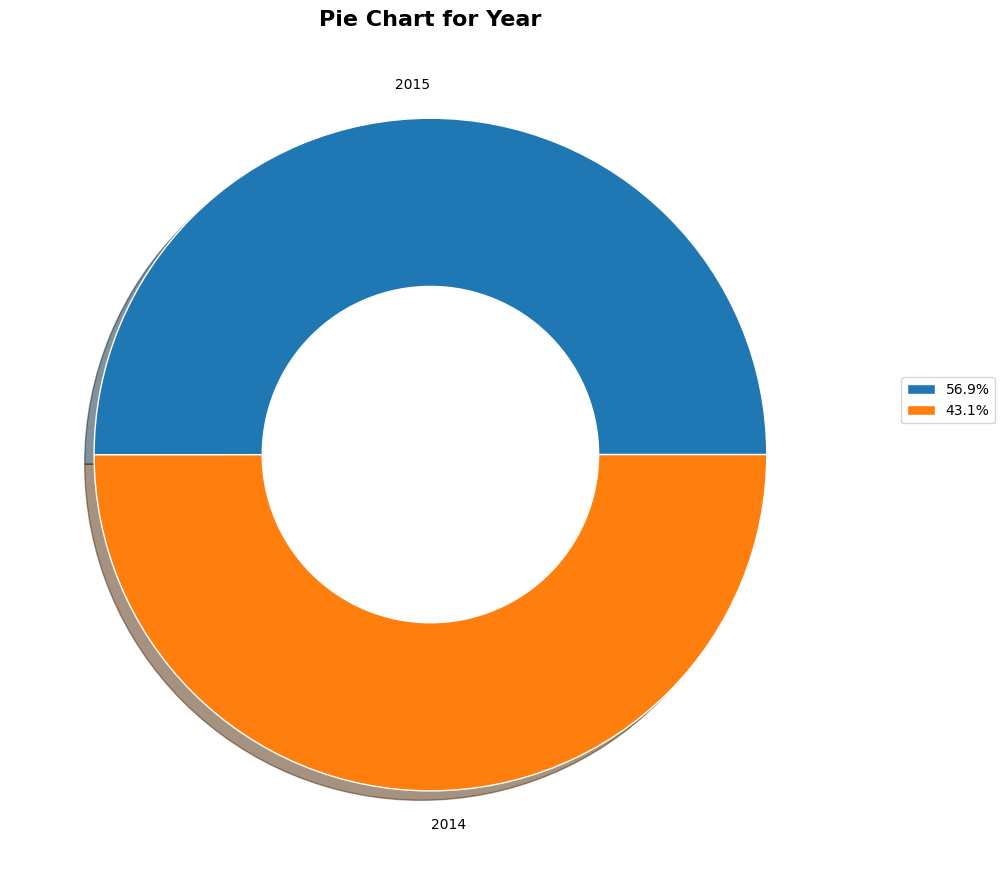

In [ ]:
pie_chart(half_processed_train, 'Year')

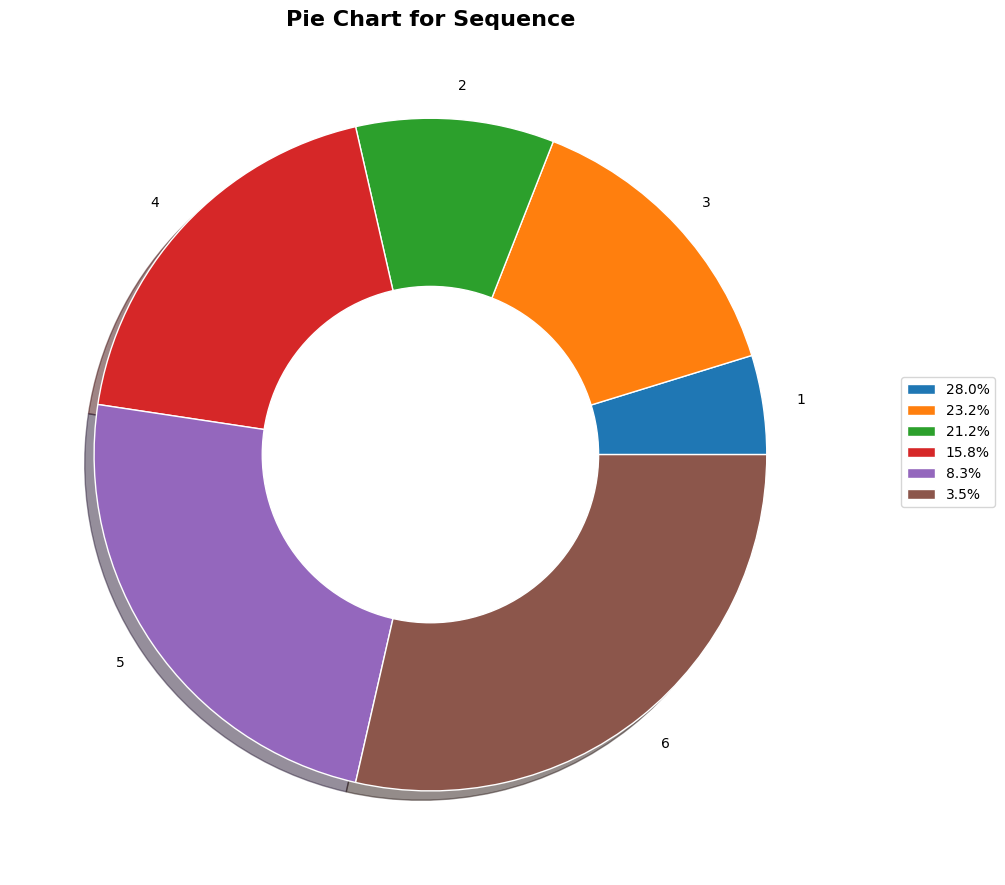

In [ ]:
pie_chart(half_processed_train, 'Sequence')

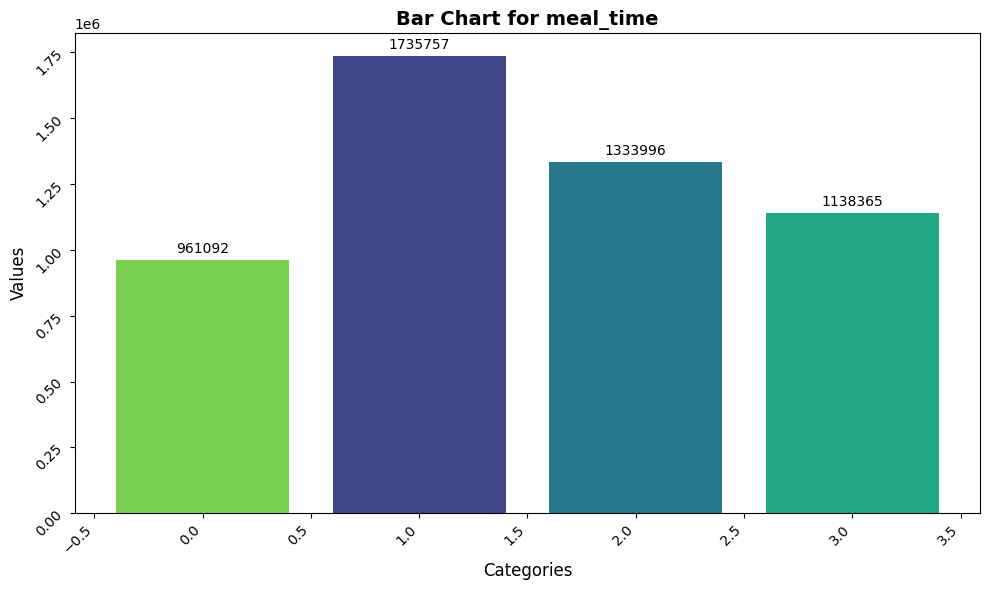

In [ ]:
bar_chart(half_processed_train, 'meal_time')

# **Here i do not drop these columns despite such big imbalance to avoid suggesting meal when for example person requires drinks or snack**

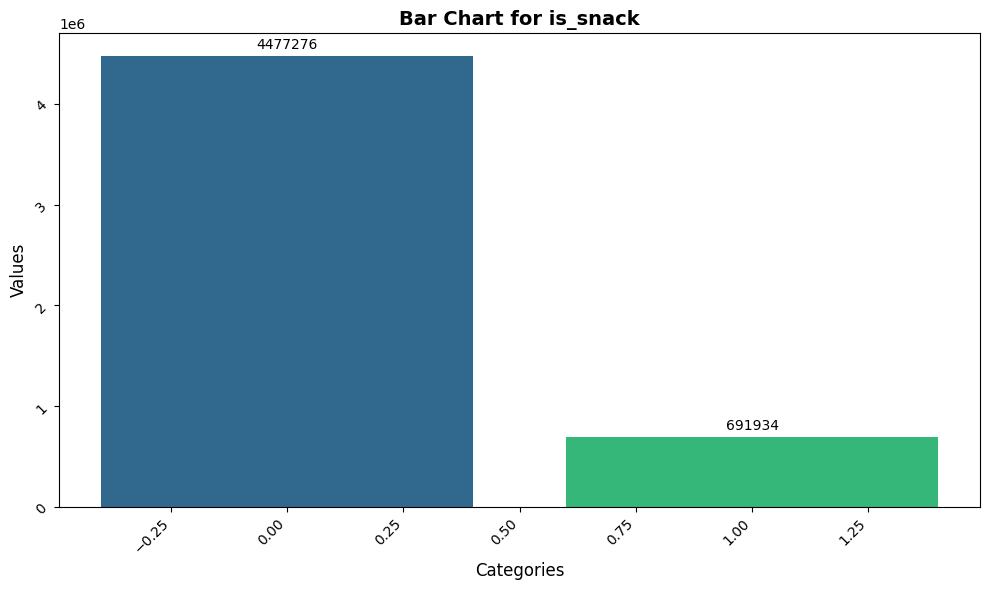

In [ ]:
bar_chart(half_processed_train, 'is_snack')

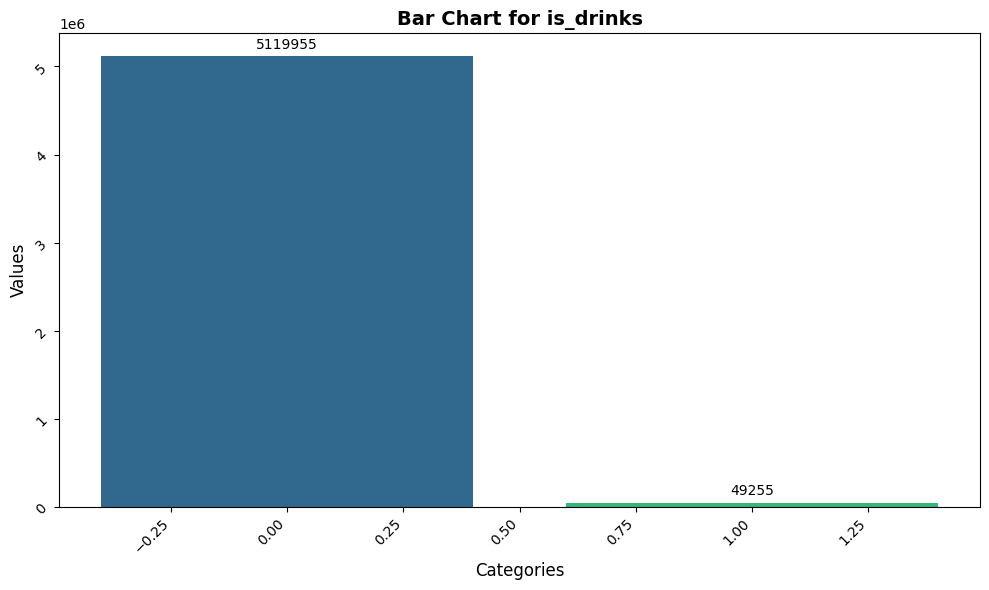

In [ ]:
bar_chart(half_processed_train, 'is_drinks')

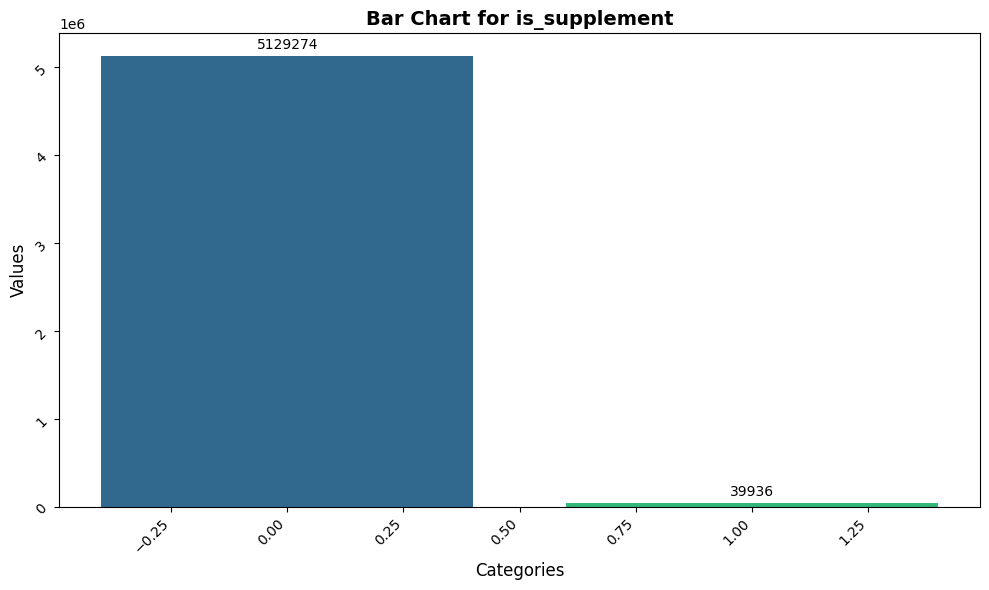

In [ ]:
bar_chart(half_processed_train, 'is_supplement')

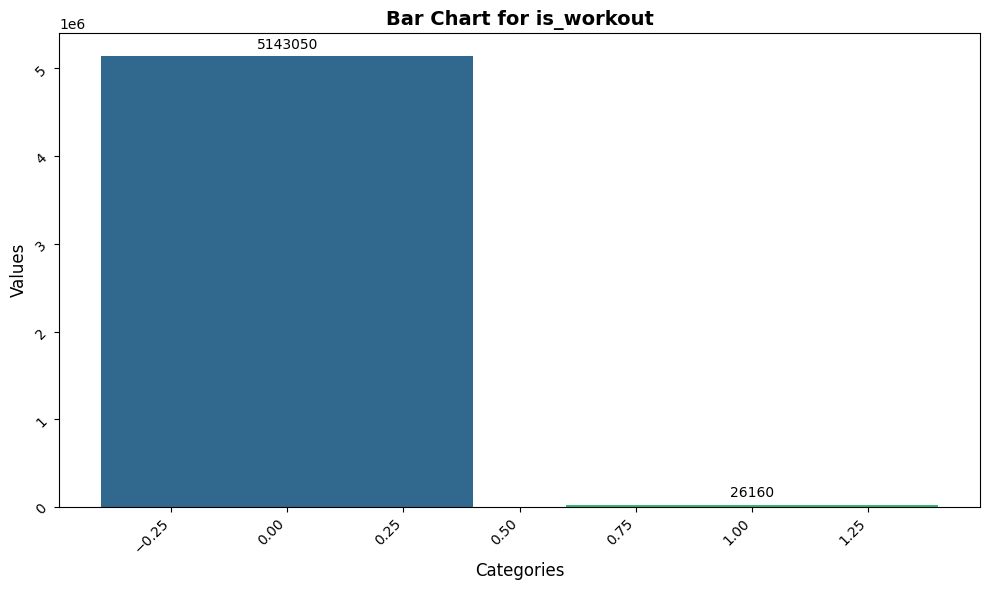

In [ ]:
bar_chart(half_processed_train, 'is_workout')

# **Here are transformation of boxplot, dropping part of outliers and replace part of it by closest whisker value**

## Before the transformation of 'Calories_goal'

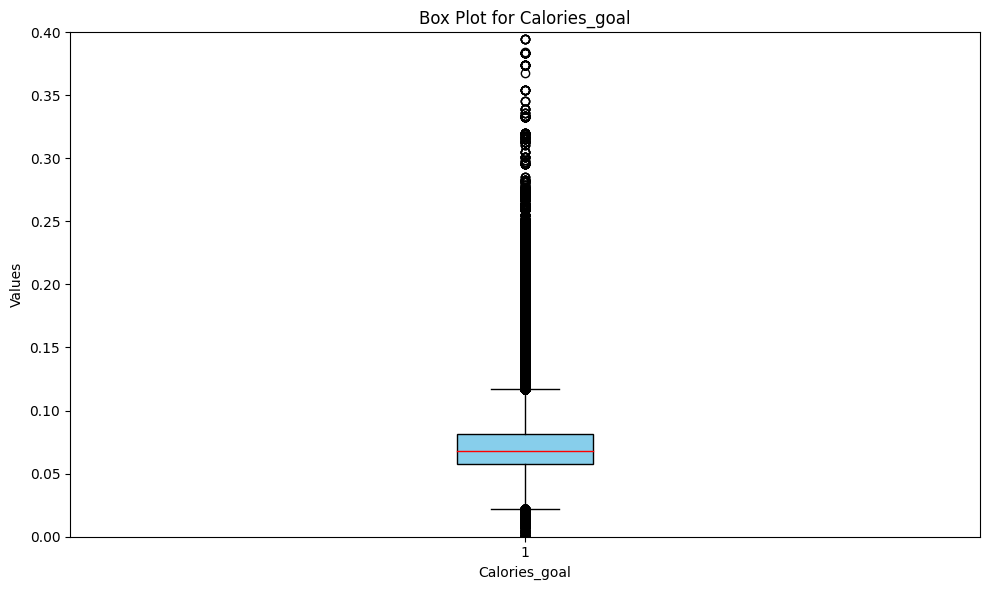

In [9]:
box_plot_for_dataset(half_processed_train, 'Calories_goal', border_up=0.4)

## After the transformation of 'Calories_goal'

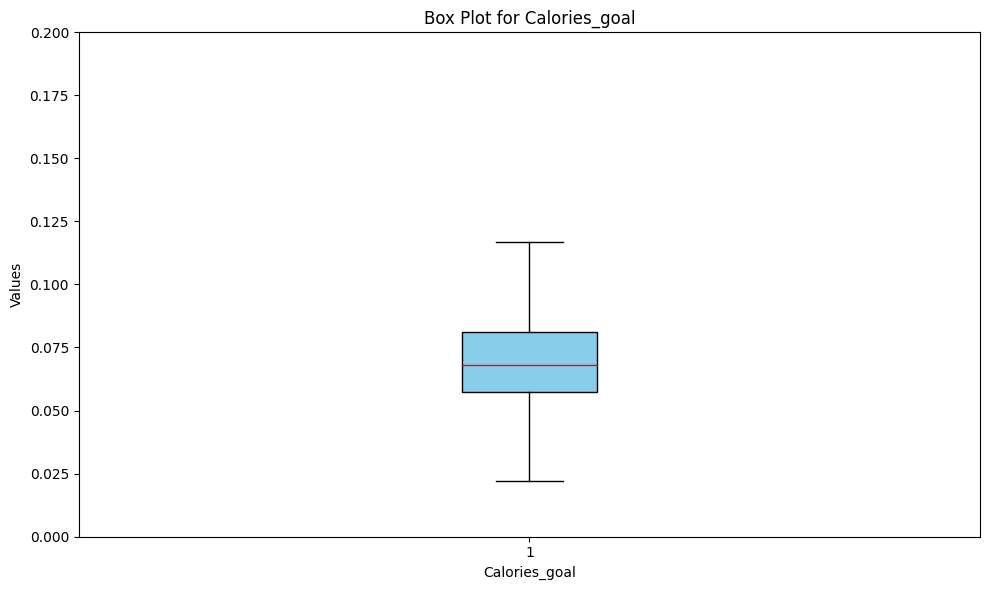

In [12]:
box_plot_for_dataset(pre_processed_train, 'Calories_goal', border_up=0.2)

## Before the transformation of 'Carbs_goal'

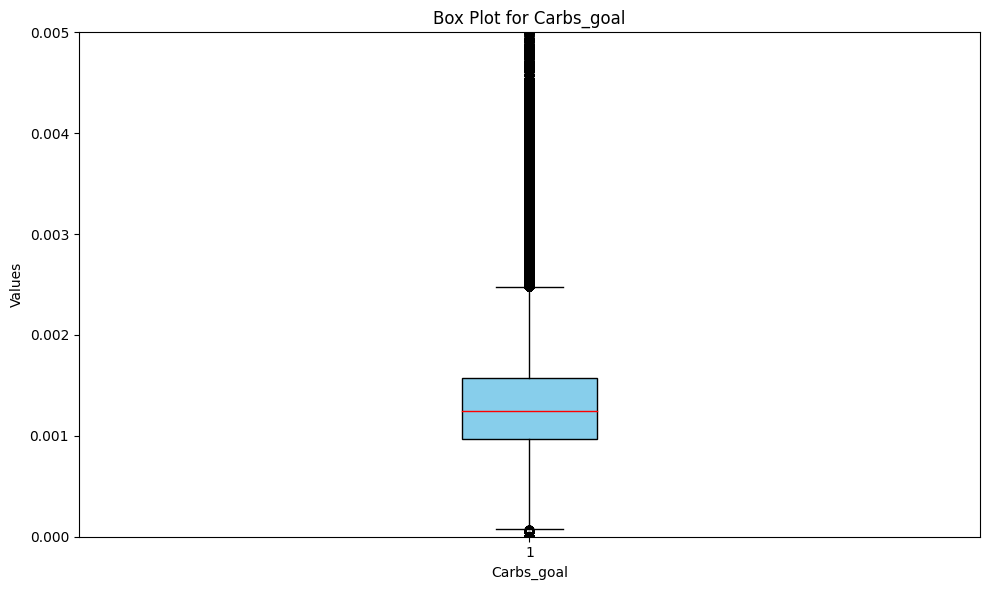

In [13]:
box_plot_for_dataset(half_processed_train, 'Carbs_goal', border_up = 0.005)

## After the transformation of 'Carbs_goal'

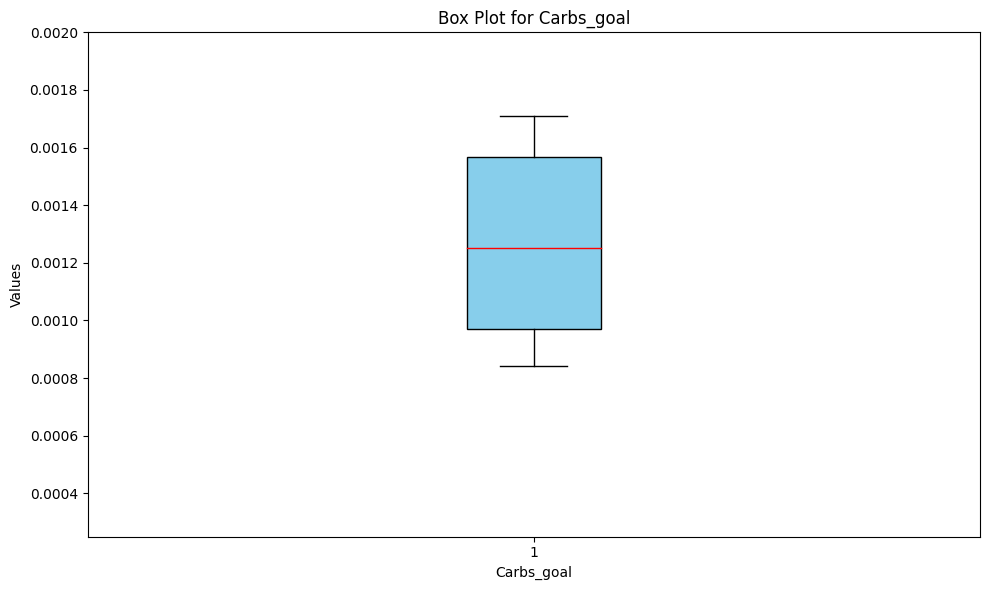

In [16]:
box_plot_for_dataset(pre_processed_train, 'Carbs_goal', border_bl= 0.00025, border_up=0.002)

## Before the transformation of 'Fiber_goal'

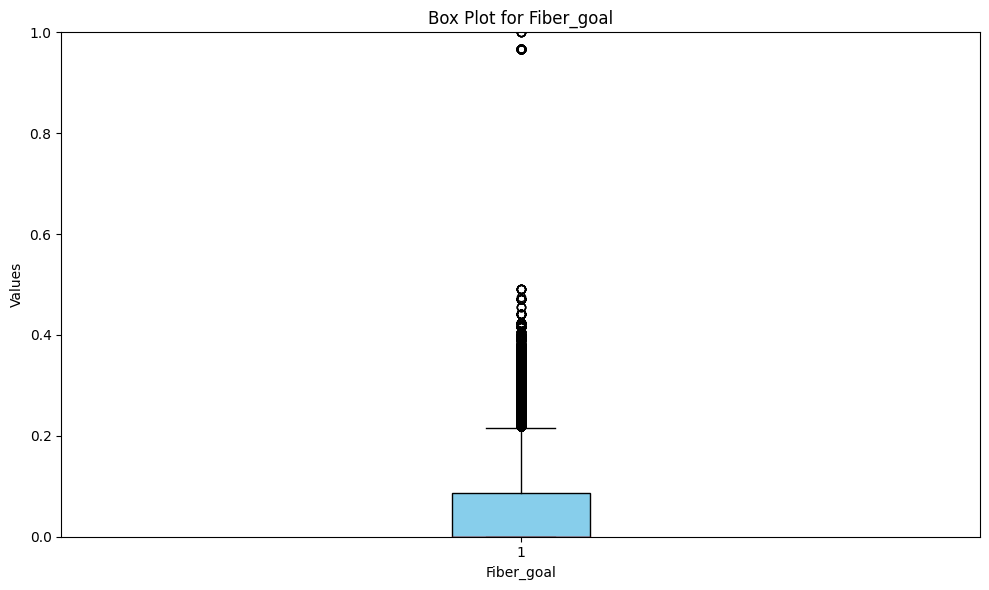

In [ ]:
box_plot_for_dataset(half_processed_train, 'Fiber_goal', border_up = 1)

## After the transformation of 'Fiber_goal'

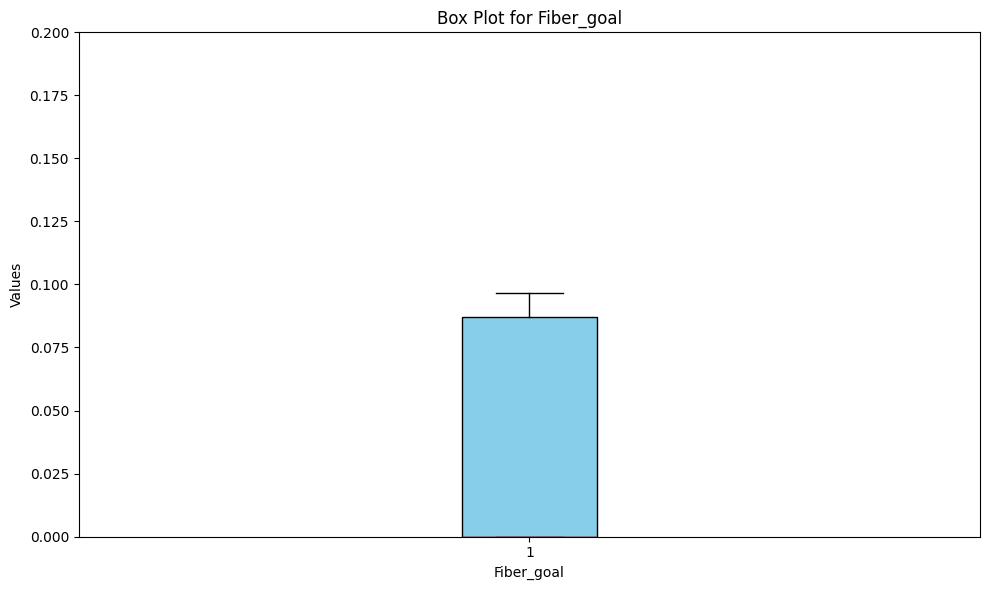

In [19]:
box_plot_for_dataset(pre_processed_train, 'Fiber_goal', border_up = 0.2)

## Before the transformation of 'Protein_goal'

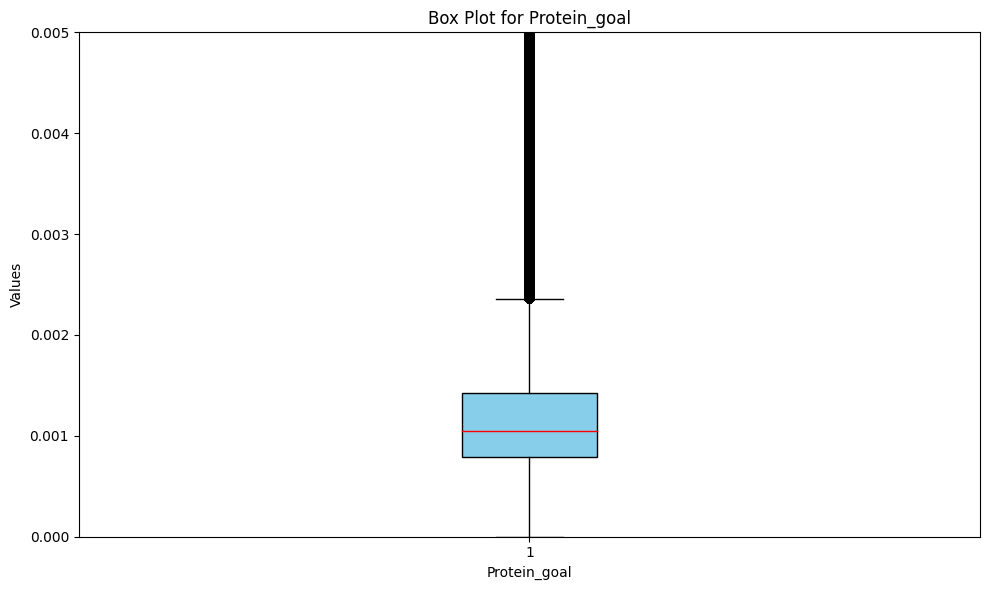

In [ ]:
box_plot_for_dataset(half_processed_train, 'Protein_goal', border_up = 0.005)

## After the transformation of 'Protein_goal'

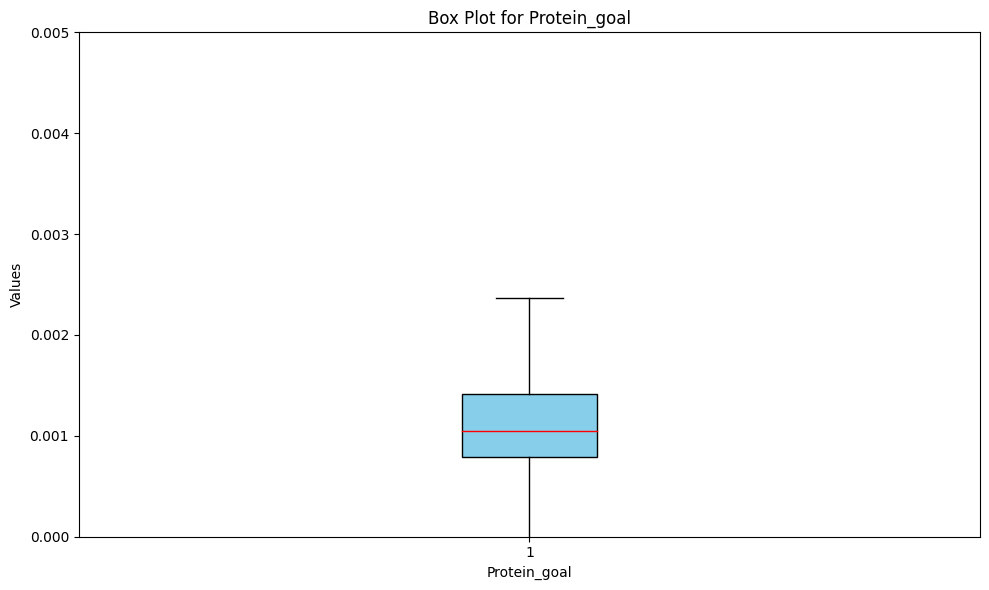

In [ ]:
box_plot_for_dataset(pre_processed_train, 'Protein_goal', border_up = 0.005)

## Before the transformation of 'Sugar_goal'

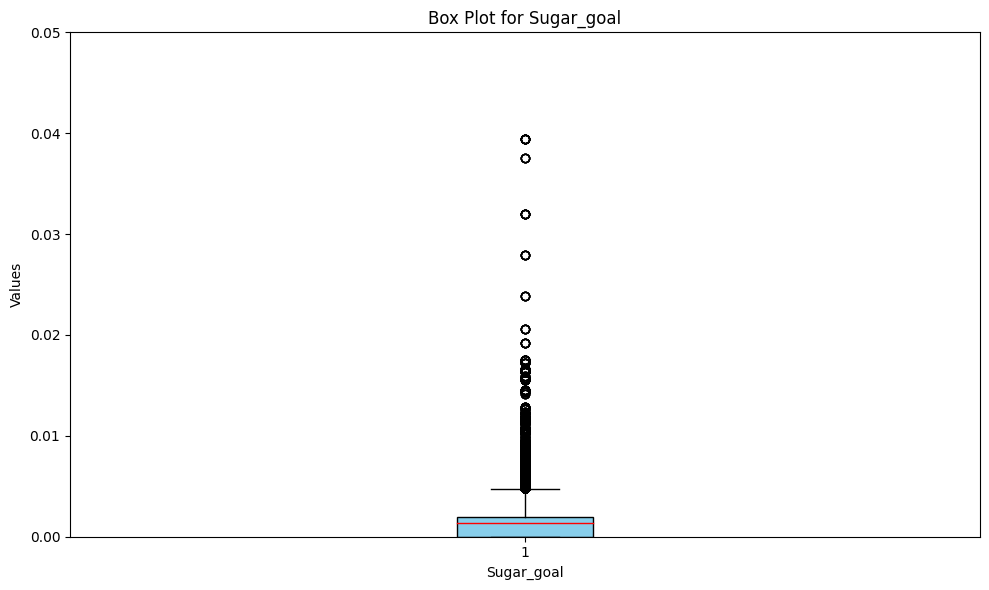

In [ ]:
box_plot_for_dataset(half_processed_train, 'Sugar_goal', border_up = 0.05)

## After the transformation of 'Sugar_goal'

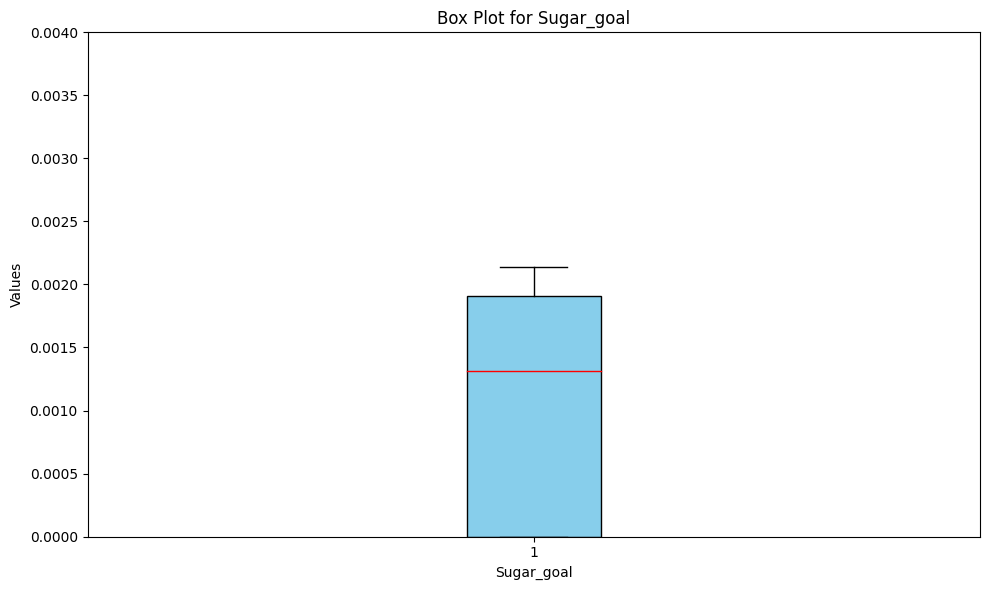

In [ ]:
box_plot_for_dataset(pre_processed_train, 'Sugar_goal', border_up = 0.004)